<a href="https://colab.research.google.com/github/hoseinm444/FanapExercises/blob/main/FFCVS_Dec23_Python_Ex09_Hosein_Mohammadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exe09

Use the best edge detection methods, to find the watch numbers' edges, you can use denoising methods before detecting edges!. (the output has to be so clear, without any noise!)

In [1]:
#imports
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#showing images
def show_img_plt(img, fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img,cmap='gray', vmin=vmin, vmax=vmax)
def show_mult_img_plt(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i],cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

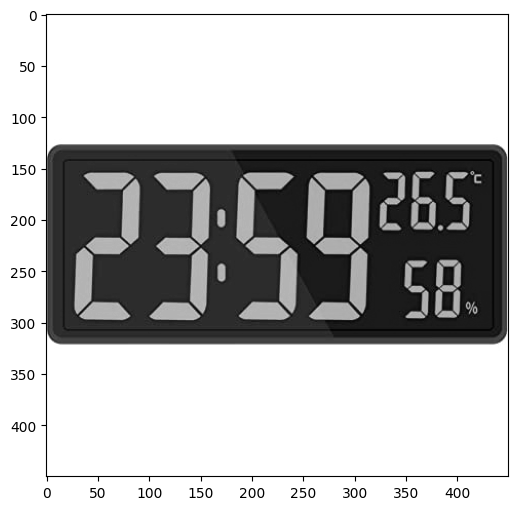

In [27]:
clock_gray_img =cv2.imread(r'clock.png',cv2.IMREAD_GRAYSCALE)
show_img_plt(clock_gray_img)

##Denoising with Guassian

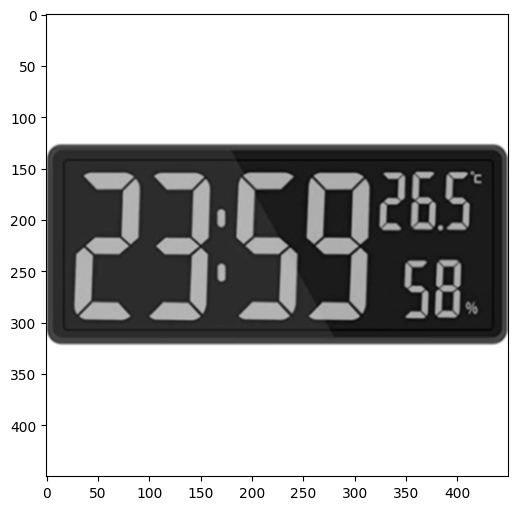

In [28]:
clock_gray_img_denoising =clock_gray_img.copy()
clock_gaussian_denoised = cv2.GaussianBlur(clock_gray_img_denoising, (3, 3), 0)
show_img_plt(clock_gaussian_denoised)

## Robert method

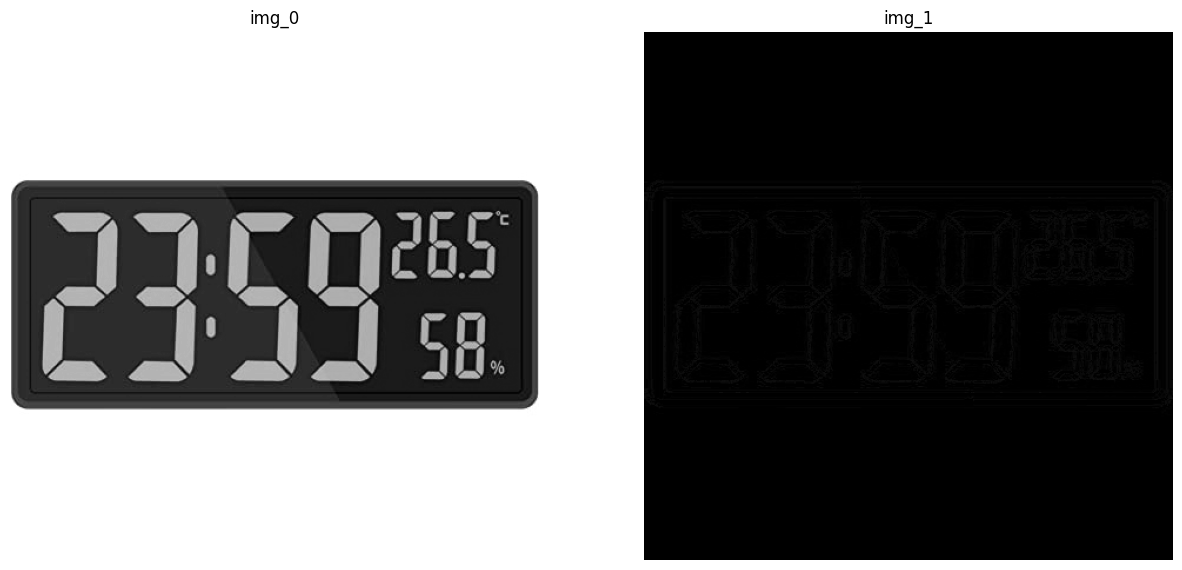

In [29]:
#robert method without float data type convert
#robert kernel
robert_kernel_x = np.array([[1, 0], [0, -1]], dtype = np.float32)
robert_kernel_y = np.array([[0, 1], [-1, 0]], dtype = np.float32)

#clock_gray_img = np.float32(clock_gray_img)

# Gradiant with convolve
robert_x_edge = cv2.filter2D(clock_gray_img, -1, robert_kernel_x)
robert_y_edge = cv2.filter2D(clock_gray_img, -1, robert_kernel_y)


robert_edge = np.sqrt(np.square(robert_x_edge) + np.square(robert_y_edge))
show_mult_img_plt(1, 2, (clock_gray_img, robert_edge))

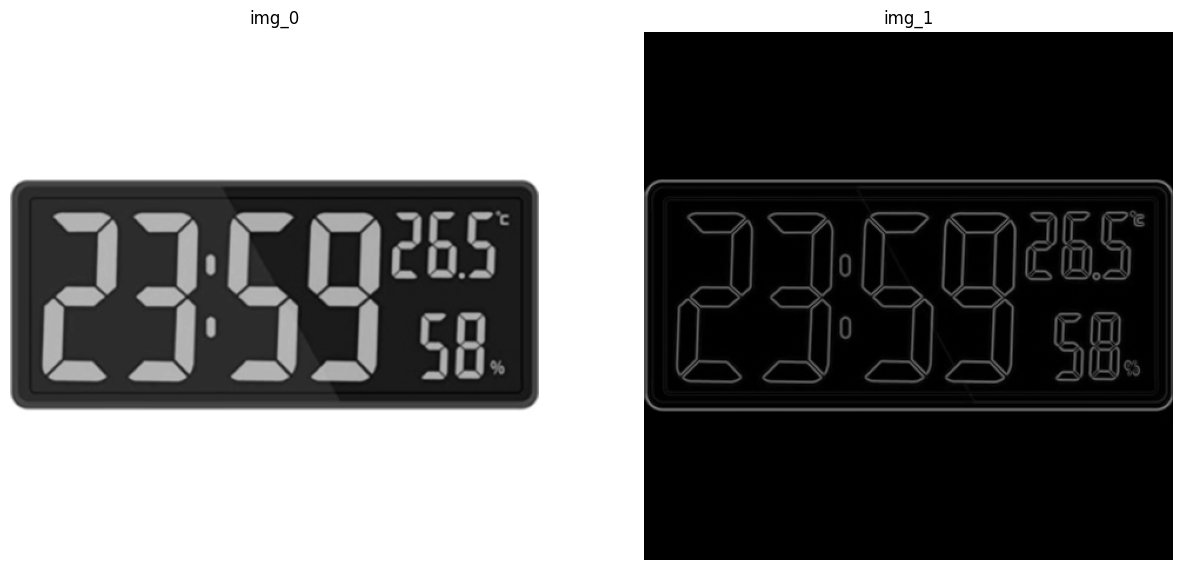

In [31]:
#robert kernel
robert_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
robert_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

clock_gaussian_denoised = np.float32(clock_gaussian_denoised)

# Gradiant with convolve
robert_x_edge = cv2.filter2D(clock_gaussian_denoised, -1, robert_kernel_x)
robert_y_edge = cv2.filter2D(clock_gaussian_denoised, -1, robert_kernel_y)


robert_edge = np.sqrt(np.square(robert_x_edge) + np.square(robert_y_edge))
show_mult_img_plt(1, 2, (clock_gaussian_denoised, robert_edge))

##Prewit method

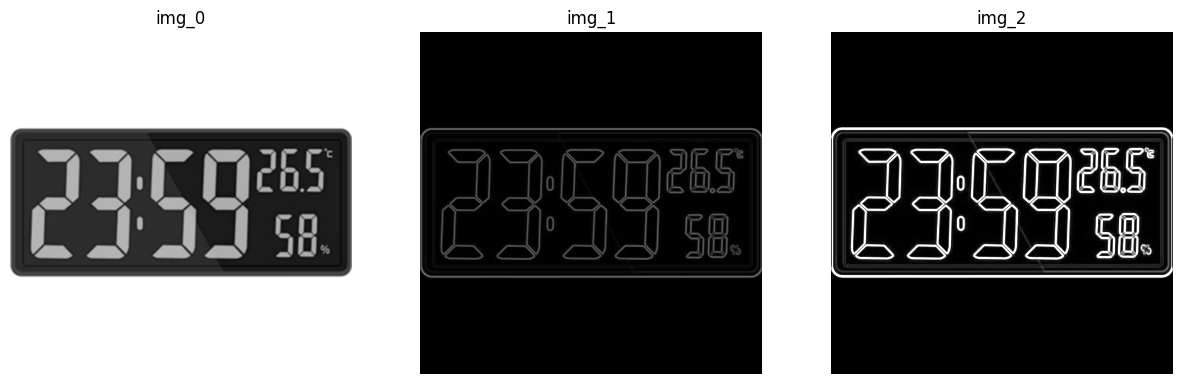

In [34]:
#prewit kernel
prewit_x_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype = np.float32)
prewit_y_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype = np.float32)

prewitt_x_edge = cv2.filter2D(clock_gaussian_denoised, -1, prewit_x_kernel)
prewitt_y_edge = cv2.filter2D(clock_gaussian_denoised, -1, prewit_y_kernel)

prewit_xy_edge = np.sqrt(np.square(prewitt_x_edge) + np.square(prewitt_y_edge))

show_mult_img_plt(1, 3, (clock_gaussian_denoised , robert_edge, prewit_xy_edge))

##Sobel Method


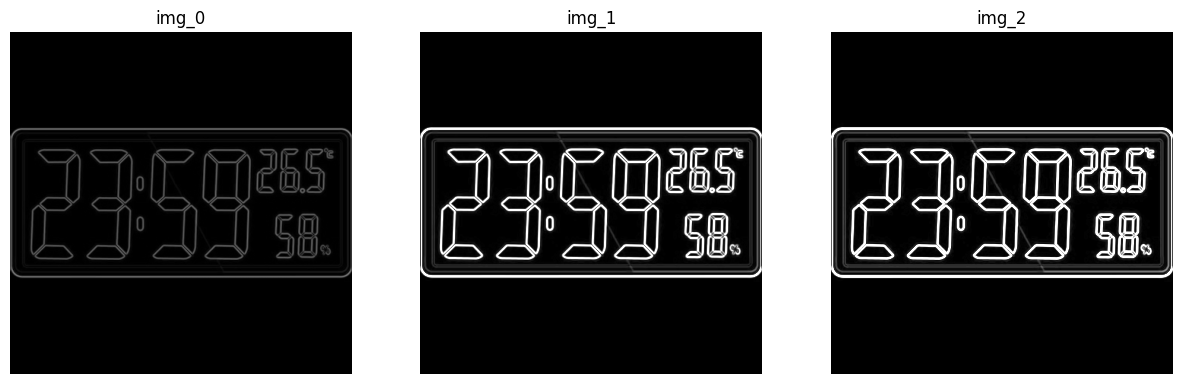

In [33]:
sobel_x = cv2.Sobel(clock_gaussian_denoised, cv2.CV_64F,1,0, ksize = 3)
sobel_y = cv2.Sobel(clock_gaussian_denoised, cv2.CV_64F,0, 1, ksize = 3)

sobel_xy = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

show_mult_img_plt(1, 3, (robert_edge, prewit_xy_edge, sobel_xy))

##Laplacian

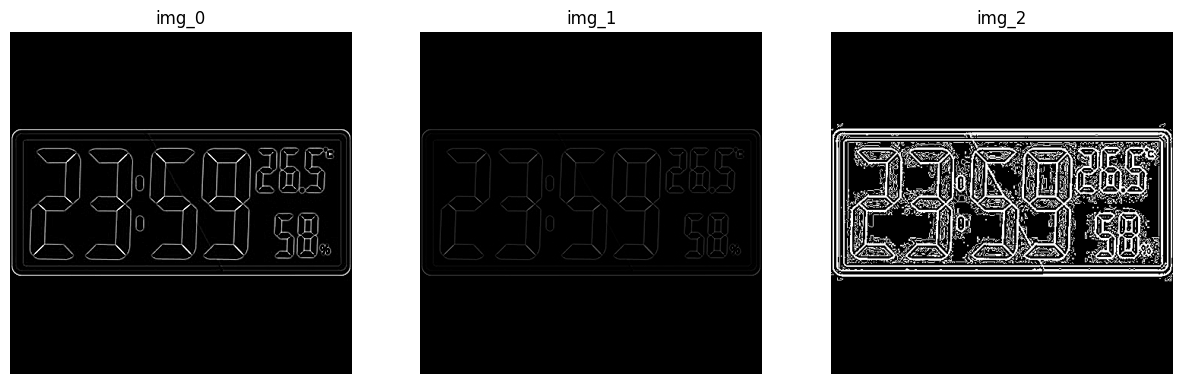

In [38]:
# opencv laplacian
opencv_laplacian = cv2.Laplacian(clock_gaussian_denoised, -1, ksize = 3)

# laplacian with our own kernel
laplacian_kernel =np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype= np.float32)
laplacian_edge = cv2.filter2D(clock_gaussian_denoised, -1, laplacian_kernel)

# laplacian with threshold
threshold_value = 0.5
ret, thresh = cv2.threshold(laplacian_edge, threshold_value, 255,cv2.THRESH_BINARY )

show_mult_img_plt(1, 3, (opencv_laplacian , laplacian_edge, thresh))

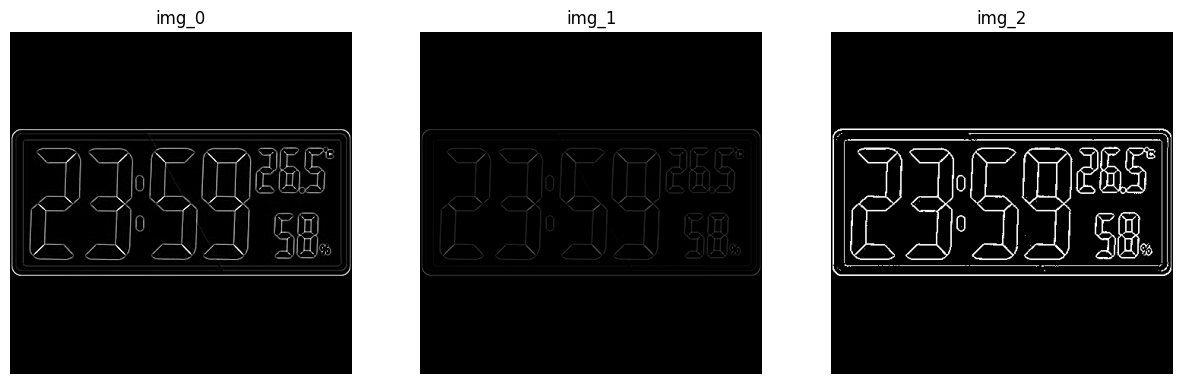

In [39]:
# laplacian with bigger threshold
threshold_value = 10
ret, thresh = cv2.threshold(laplacian_edge, threshold_value, 255,cv2.THRESH_BINARY )

show_mult_img_plt(1, 3, (opencv_laplacian , laplacian_edge, thresh))